# Stochastic Gradient Descent on Linear Regression

Imagine you like to go to the gym; however, you hate getting to the gym and finding that it is so crowded that you must wait to use the machines you want. We have a dataset which contains historic information about how crowded the campus gym is on a given day and hour, as well as other specific information about the specific days.

* You can download the dataset here

## Inspecting the dataset

In [1]:
#importing main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing scikit libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor


In [2]:
#loading the dataset
crowd = pd.read_csv('crowdness_gym_data.csv')
crowd.head(10)

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17
5,46,2015-08-14 18:00:18-07:00,64818,4,0,0,72.15,0,0,8,18
6,43,2015-08-14 18:20:08-07:00,66008,4,0,0,72.15,0,0,8,18
7,53,2015-08-14 18:30:09-07:00,66609,4,0,0,72.15,0,0,8,18
8,54,2015-08-14 18:40:14-07:00,67214,4,0,0,72.15,0,0,8,18
9,43,2015-08-14 18:50:15-07:00,67815,4,0,0,72.15,0,0,8,18


In [3]:
#dataset's info
crowd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


* There are 62,184 observations in the dataset and 11 columns.
* `number_people` is our target columns, showing the crowdedness 
* data is clean and there are no null entries 

## Feature selection

In [4]:
#finding the correlation among all features
corr = crowd.corr()
corr

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
number_people,1.000000,0.550218,-0.162062,-0.173958,-0.048249,0.373327,0.182683,0.335350,-0.097854,0.552049
timestamp,0.550218,1.000000,-0.001793,-0.000509,0.002851,0.184849,0.009551,0.044676,-0.023221,0.999077
day_of_week,-0.162062,-0.001793,1.000000,0.791338,-0.075862,0.011169,-0.011782,-0.004824,0.015559,-0.001914
is_weekend,-0.173958,-0.000509,0.791338,1.000000,-0.031899,0.020673,-0.016646,-0.036127,0.008462,-0.000517
is_holiday,-0.048249,0.002851,-0.075862,-0.031899,1.000000,-0.088527,-0.014858,-0.070798,-0.094942,0.002843
temperature,0.373327,0.184849,0.011169,0.020673,-0.088527,1.000000,0.093242,0.152476,0.063125,0.185121
is_start_of_semester,0.182683,0.009551,-0.011782,-0.016646,-0.014858,0.093242,1.000000,0.209862,-0.137160,0.010091
is_during_semester,0.335350,0.044676,-0.004824,-0.036127,-0.070798,0.152476,0.209862,1.000000,0.096556,0.045581
month,-0.097854,-0.023221,0.015559,0.008462,-0.094942,0.063125,-0.137160,0.096556,1.000000,-0.023624
hour,0.552049,0.999077,-0.001914,-0.000517,0.002843,0.185121,0.010091,0.045581,-0.023624,1.000000


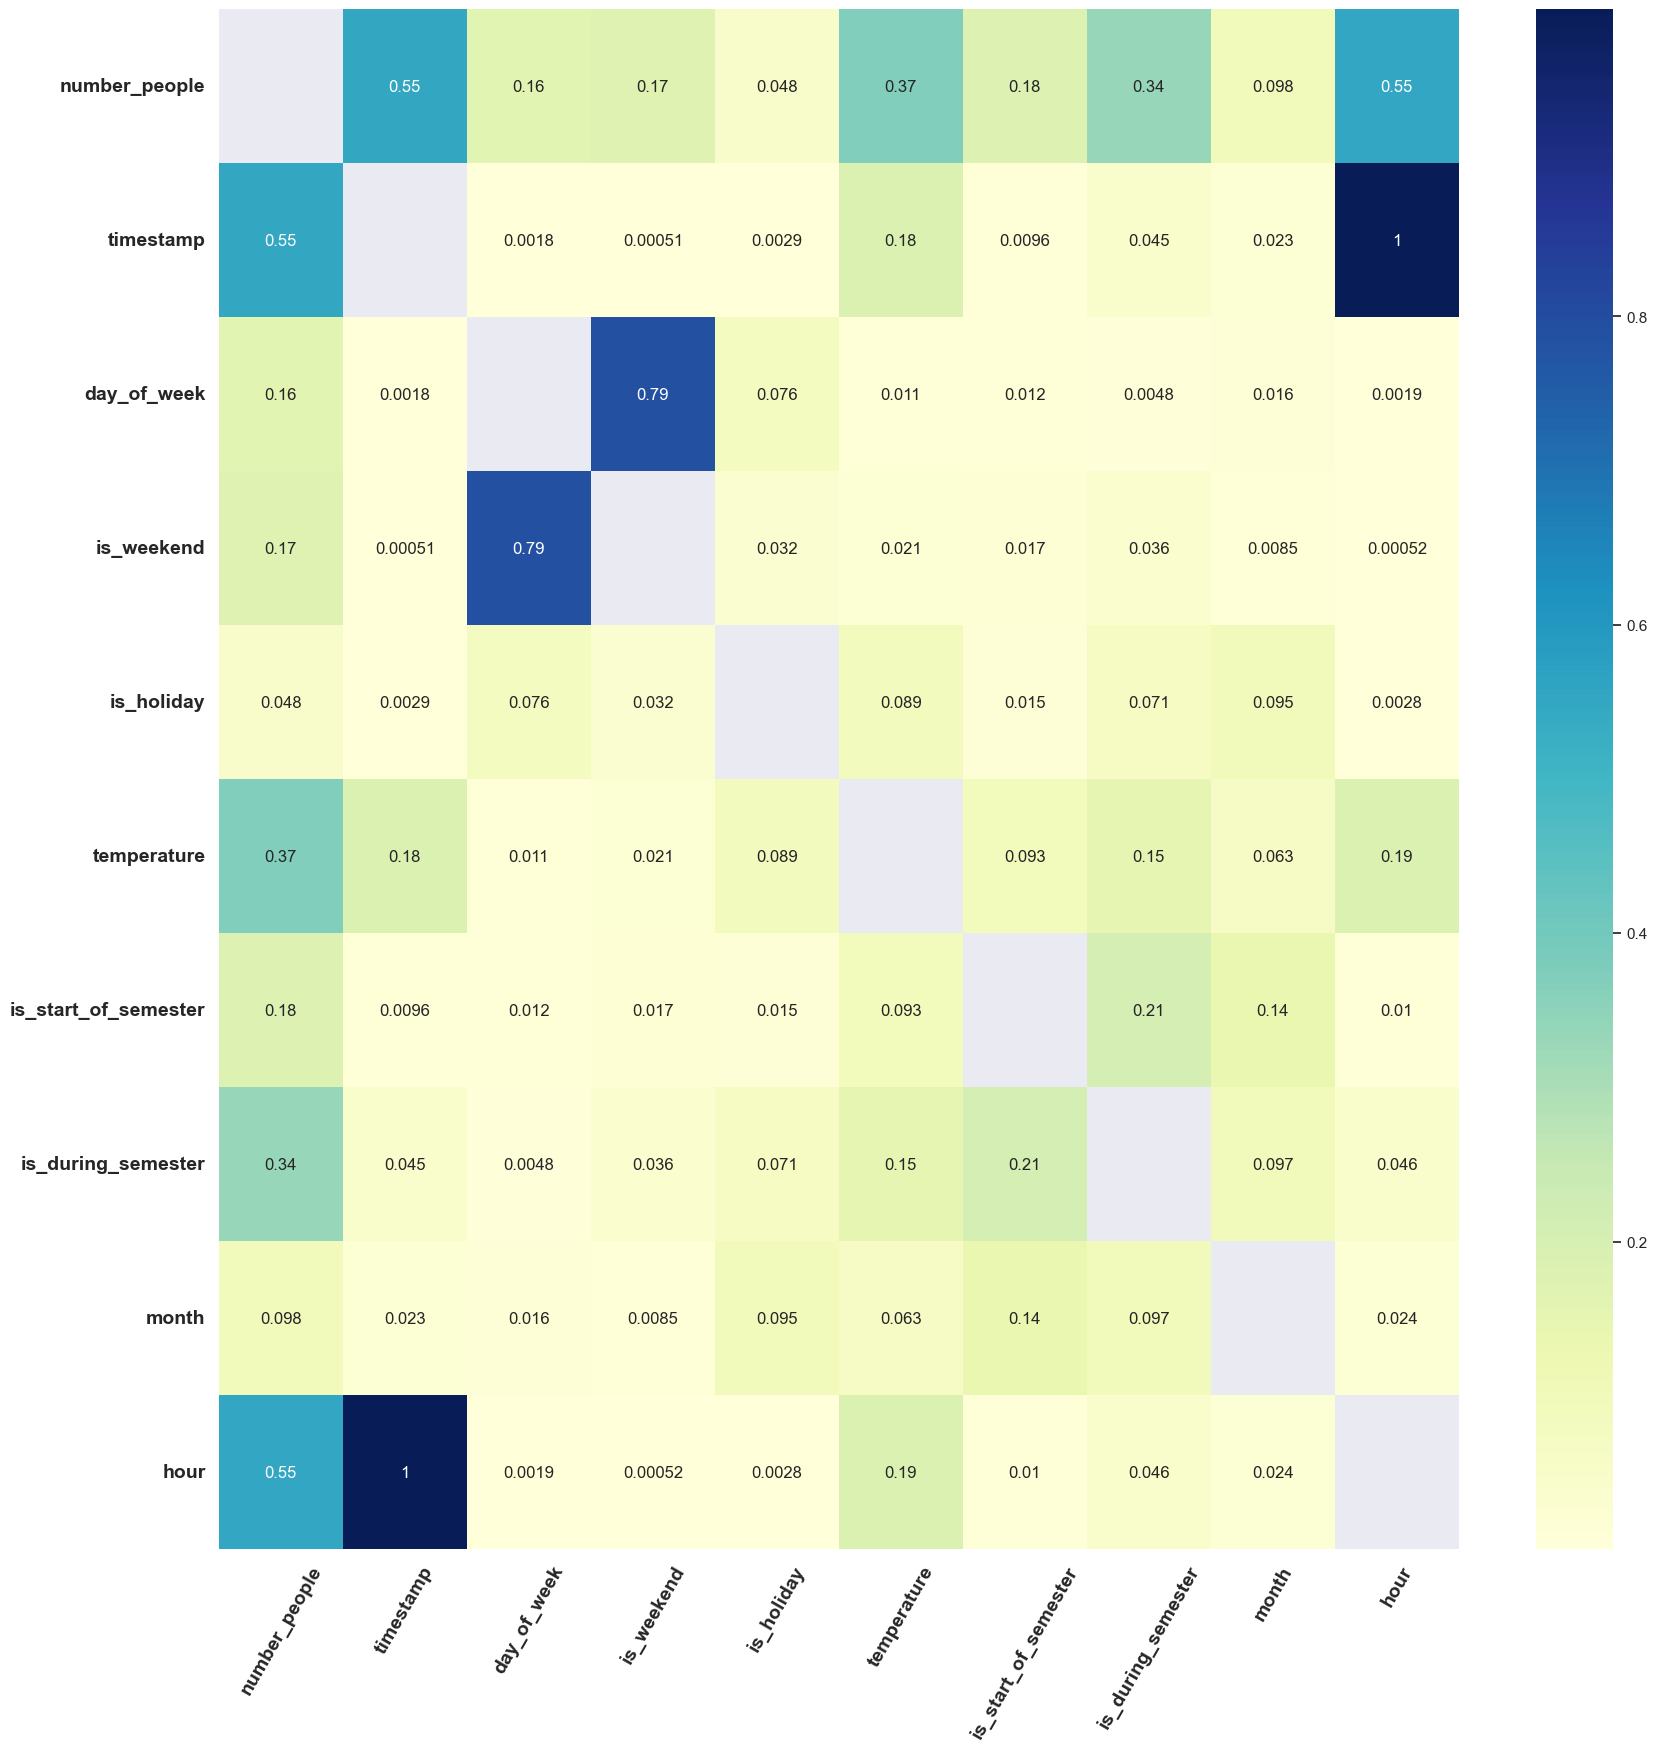

In [5]:
#creating a heatmap for the correlations
sns.set_theme()
plt.figure(figsize = (20,20))
sns.heatmap(corr.abs()[corr<1], annot = True, cmap = 'YlGnBu')
plt.xticks(weight = 'bold', fontsize = 14, rotation = 60)
plt.yticks(weight = 'bold', fontsize = 14, rotation = 0)

plt.show()

some points:
- there is an alomost complete correlation between the timestamp and hour, since these two values are showing the same value(with different precisions)
- there is a high correlation between 'day of week' and 'is holidy', since most holidays are during weekends(which are constant during time), except special occasions like the labor day and ...
- the target column, `number_peope`, shows higher correlations(ie, above 0.2) with **hour**, **is during semester**, and **tempreture**.


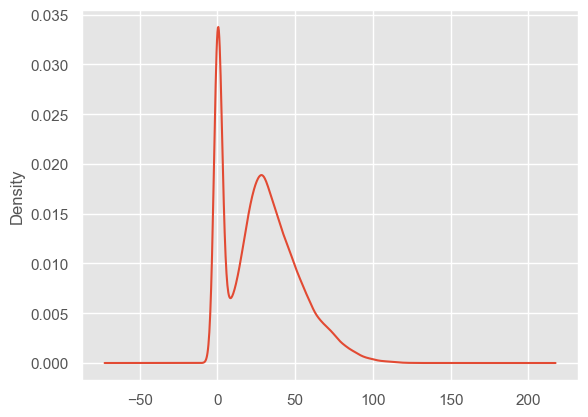

In [6]:
### exploring the dataset >1. examining the distribution of target column
plt.style.use('ggplot')
fig, ax = plt.subplots()
crowd['number_people'].plot.kde(ax = ax)
plt.show()


- the distribution of number of people is not a symmetric bell-shaped distribution.

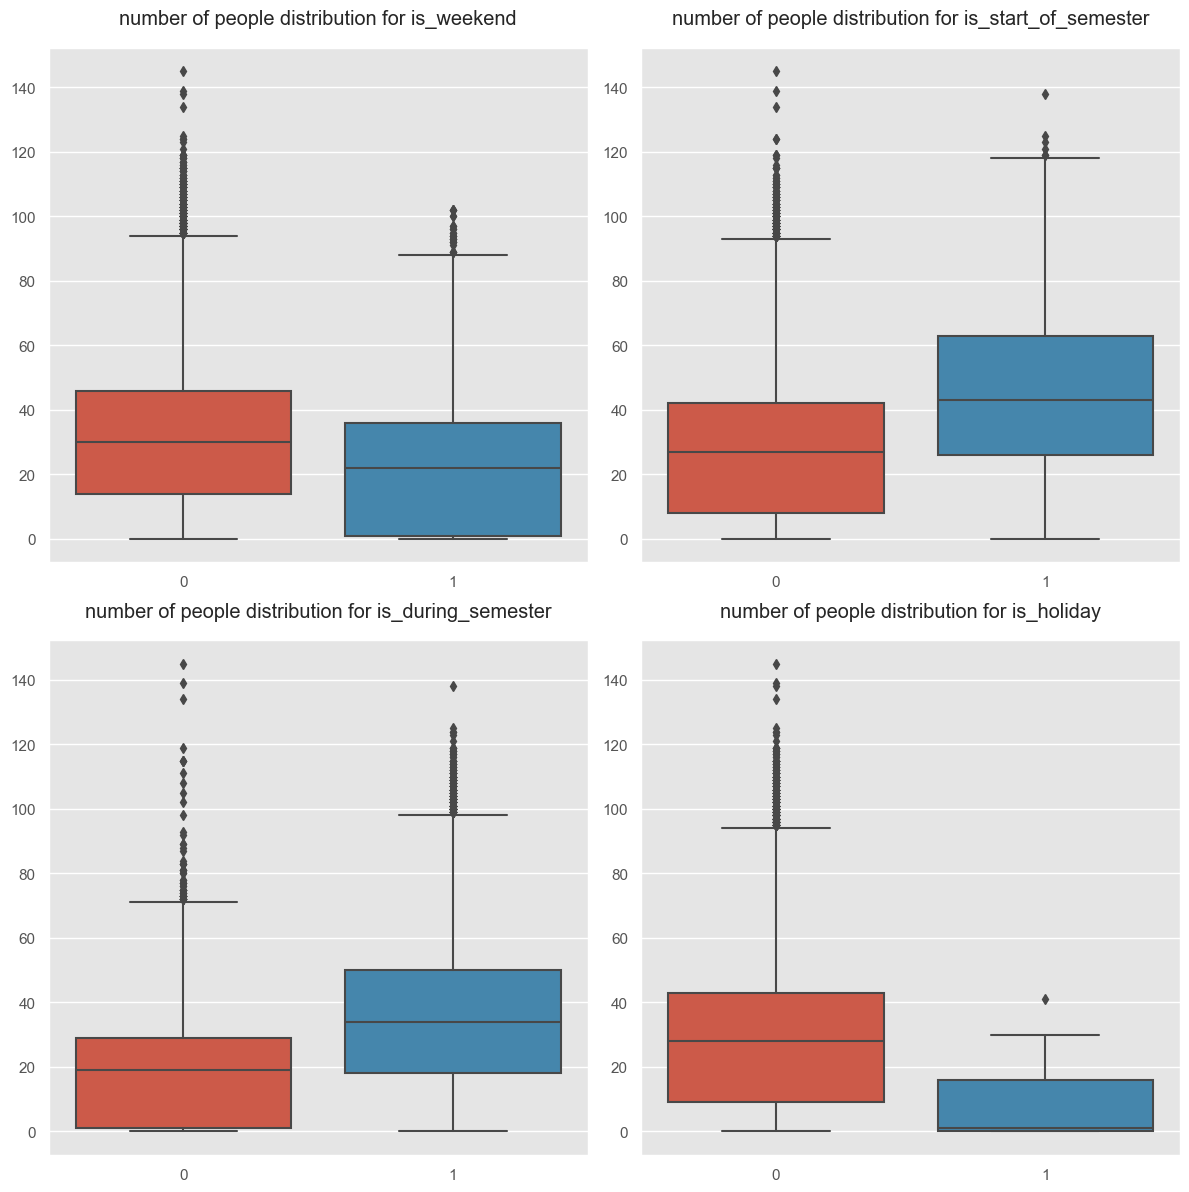

In [7]:
#exploring the dataset>2. visualizing boolean columns
boolean_columns = ['is_weekend', 'is_start_of_semester', 'is_during_semester', 'is_holiday']

fig = plt.figure(figsize = (12,12))

for i,cl in enumerate(boolean_columns):
    ax = fig.add_subplot(2,2,i+1)
    sns.boxplot(data = crowd, x = cl, y = 'number_people')
    ax.set_xlabel('')
    ax.set_title(f'number of people distribution for {cl}', y= 1.03)
    ax.set_ylabel('')
    
plt.tight_layout()
plt.show()

- all plots show a slight relationship between that value and number of people 

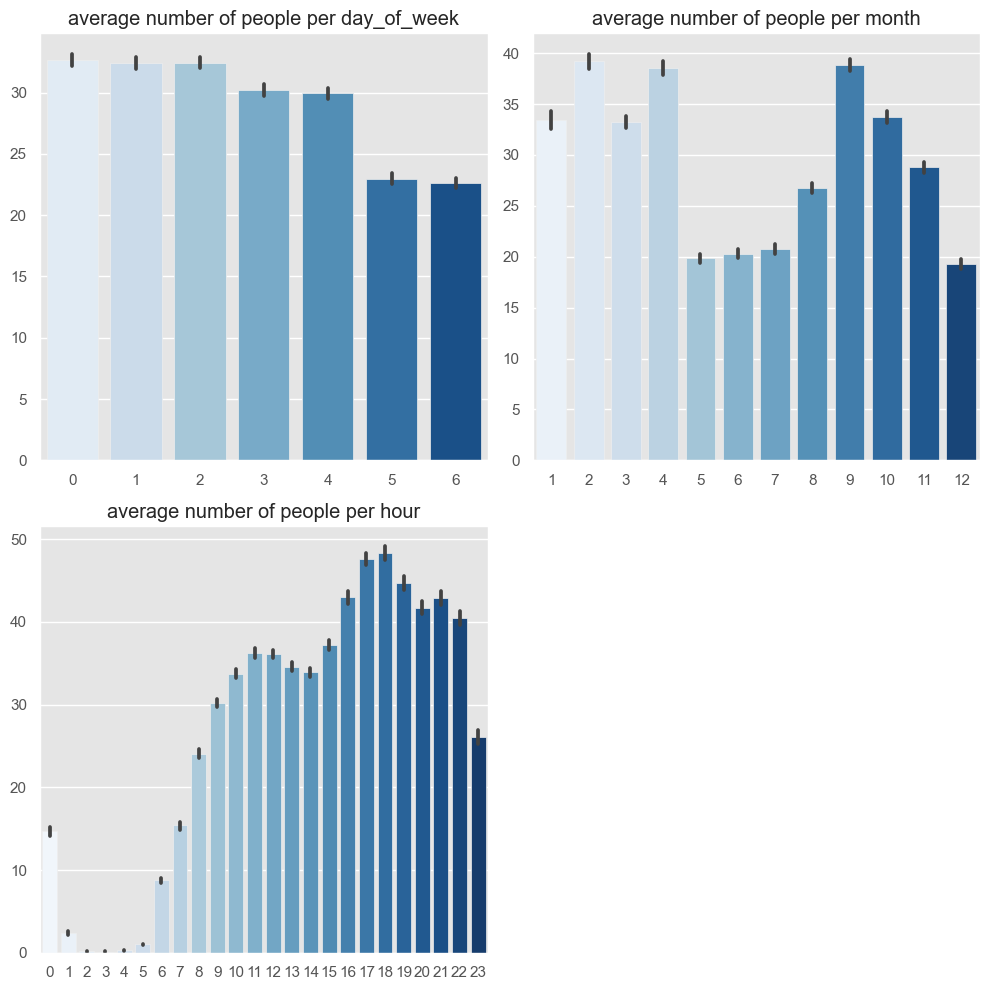

In [8]:
hist=['day_of_week','month', 'hour']

fig = plt.figure(figsize = (10,10))
for i,cl in enumerate(hist):
    ax = plt.subplot(2,2,i+1)
    sns.barplot(data = crowd, x = cl, y = 'number_people',ax = ax, palette = 'Blues')
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_title(f'average number of people per {cl}')
    
    
plt.tight_layout()
plt.show()

some points:
- people tend to go to the gym at months 4,5, and 6 less than other months
- in the begining days of the week, people tend to attend the gym more thant other days
- we see a rise in average number of people from 4 p.m.

### Cleaning the dataset

In [9]:
#there is no need to timestamp and date columns because they are represented by other columns
crowd_modif = crowd.drop(['timestamp', 'date'], axis = 1)
crowd_modif.describe()

,number_people,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


## Building the model

In [10]:
#building the test and train sets
X = crowd_modif.drop(columns = ['number_people'])
y = crowd_modif['number_people']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)


In [11]:
#training the model
sgd = SGDRegressor(max_iter=10000)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)

In [12]:
#measuring model's performance
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred, squared = False)
mae = mean_absolute_error(y_test, y_pred)

print(f'R2 socre: {r2:.2f}\nMSE: {mse:.2f}\nRMSE: {rmse:.2f}\nMean Absolute Error {mae:.2f}')

R2 socre: 0.08
MSE: 481.90
RMSE: 21.95
Mean Absolute Error 18.31


In [27]:
#the predictor line
coef = sgd.coef_
intercept = sgd.intercept_
print(coef)
print(intercept)

[ -1.08534091  -4.88567046 -63.92545964   1.09654083   6.62295282
  12.3927306   -0.98500724   1.63685462]
[-37.21939357]


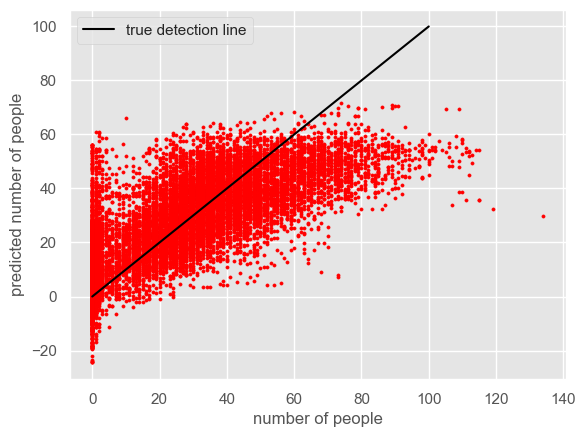

In [74]:
#visualizing the predicted values vs. true values
plt.scatter(y_test, y_pred, marker = 'o', s = 5, color = 'red')
plt.xlabel('number of people')
plt.ylabel('predicted number of people')
plt.plot([0,100], [0,100], color = 'black', label = 'true detection line')
plt.legend()
plt.show()

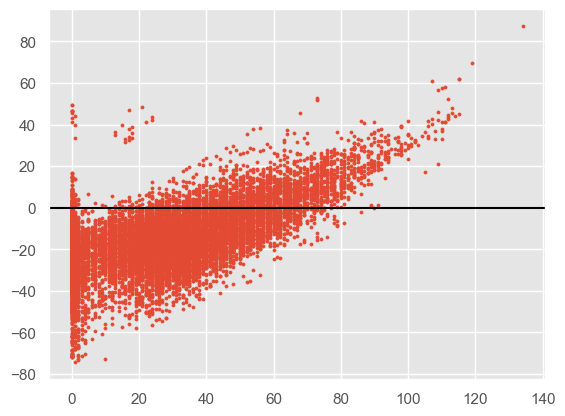

-14.57760080900267


In [32]:
res = y_test - y_pred
plt.scatter(y_test, res, s = 5)
plt.axhline(0, color = 'black')
plt.show()
print(res.mean())

points:
- since we used mean_squared as our loss function in the SGDRegressor,we are predicting our model based on a multiple regression model. As a result, by plotting the residuals vs. true values we should see a constant line around the zero line, which is not seen in the last graph. It shows that the model tends to **overestimate** for low number of people and underestimate for high number of people. 

## Scaling the data

At the core of MSE function, we are calculating the distance between the points and a line. As a result, it's recommended to scale our X set to control the effect of variables with very high or very low magnitudes

In [40]:
#scaling x sets
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

sgd = SGDRegressor()
sgd.fit(X_train_scaled, y_train)
y_pred = sgd.predict(X_test_scaled)

#finding model's performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred, squared = False)
mae = mean_absolute_error(y_test, y_pred)

print(f'R2 socre: {r2:.2f}\nMSE: {mse:.2f}\nRMSE: {rmse:.2f}\nMean Absolute Error {mae:.2f}')

R2 socre: 0.51
MSE: 260.27
RMSE: 16.13
Mean Absolute Error 12.27


Point:
- model's R2 score increased drastically to an acceptable level. 

In [41]:
#the predictor line
coef = sgd.coef_
intercept = sgd.intercept_
print(coef)
print(intercept)

[-1.68663383 -2.48828991 -0.51084578  5.669225    1.82158618  5.84661887
 -2.99345929 11.11027812]
[28.94880556]


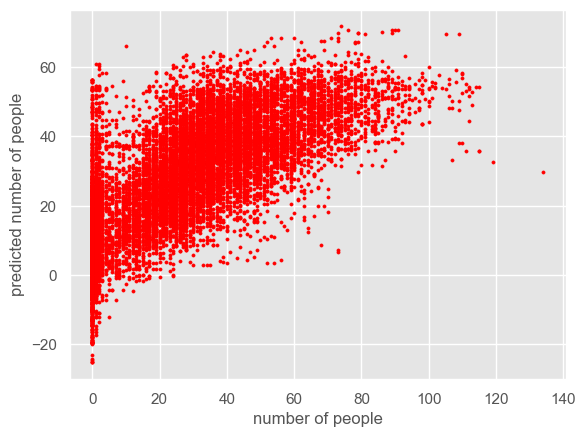

In [42]:
#visualizing the predicted values vs. true values
plt.scatter(y_test, y_pred, marker = 'o', s = 5, color = 'red')
plt.xlabel('number of people')
plt.ylabel('predicted number of people')
plt.show()

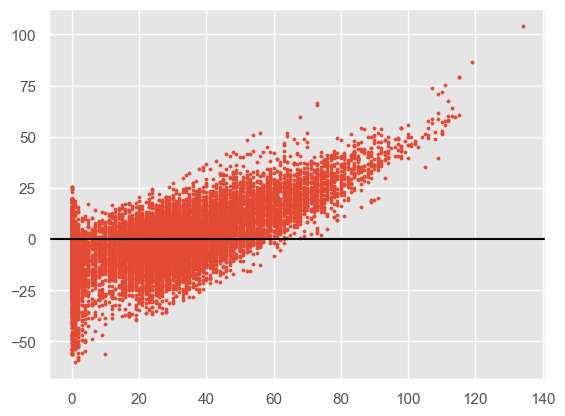

0.08514450928128034


In [46]:
res = y_test - y_pred
plt.scatter(y_test, res, s = 5)
plt.axhline(0, color = 'black')
plt.show()
print(res.mean())

Althoug the mean of residuals has decreased to near zero values, we still see the same behavior by the model: overestimating at low numbers of the target column and underestimating at high numbers. The solution might be transforming the outcome itself or using another set of models/algorithems. 

## Hyperparameter Tuning

In [59]:
#using GridSearchCV to find the best parameters and estimator

from sklearn.model_selection import GridSearchCV
sgd = SGDRegressor()
params = {'loss': ['squared_error', 'huber', 'epsilon_insensitive'], 
          'learning_rate':['optimal', 'invscaling', 'adaptive'],
         'alpha' : [0.1, .01, 0.001, 0.0001]}
grid = GridSearchCV(estimator = sgd, param_grid = params, scoring = 'r2')
grid.fit(X_train_scaled,y_train)

best_params = grid.best_params_
best_score = grid.best_score_

print(f'best parameters: {best_params}\nbest possible R2 score: {best_score:.2f}')
    

best parameters: {'alpha': 0.0001, 'learning_rate': 'adaptive', 'loss': 'squared_error'}
best possible R2 score: 0.51


## Final model

In [63]:
#in this stage, we use best parameters to build our final model and draw some concolusions
sgd = SGDRegressor( alpha = 0.0001, learning_rate = 'adaptive', loss ='squared_error')
sgd.fit(X_train_scaled, y_train)

y_pred = sgd.predict(X_test_scaled)


In [67]:
#finding coefficients and intercept
coef = sgd.coef_
intercept = sgd.intercept_

coef_df = pd.DataFrame({'variable': X.columns, 'predictor' : coef})
coef_df

,variable,predictor
0,day_of_week,-1.713693
1,is_weekend,-2.428470
2,is_holiday,-0.602907
3,temperature,5.465459
4,is_start_of_semester,1.803304
5,is_during_semester,6.000981
6,month,-2.701512
7,hour,11.155433


In [75]:
#finding model's performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred, squared = False)
mae = mean_absolute_error(y_test, y_pred)

print(f'R2 socre: {r2:.2f}\nMSE: {mse:.2f}\nRMSE: {rmse:.2f}\nMean Absolute Error {mae:.2f}')

R2 socre: 0.51
MSE: 259.97
RMSE: 16.12
Mean Absolute Error 12.28


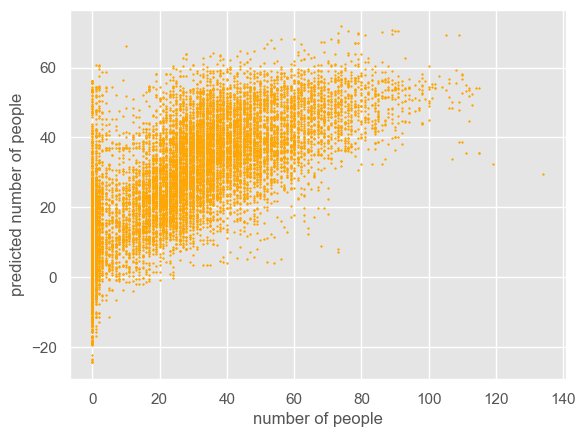

In [71]:
#visualizing the predicted values vs. true values
plt.scatter(y_test, y_pred, marker = '.', s = 5, color = 'orange')
plt.xlabel('number of people')
plt.ylabel('predicted number of people')
plt.show()

Points:
- We should go to the gym at the begining days of weeks, while it's a weekend, holiday, the tempreture is low, it's not during or at the begining of semesters(ie, not during education year), in the mornings, and in the last months' of a year. 

## Conclusion

**Overal results**
- in the first non-scaled model, we got a low R2 score(0.08).
- in the final scaled model and after finding best estimator, we reached to an acceptable R2 score(0.51).
- The final MSE is 259.97 and mean absolute error is 12.28
- The strongest coefficients are hour, tempreture, and is_during_semester. 